In [3]:
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

print(tf.__version__)

2.3.0


In [ ]:
from

In [4]:
df = pd.read_csv("data/boston.csv",header = 0)
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [5]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


In [6]:
df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [7]:
ds = df.values

In [8]:
print(ds.shape)

(506, 13)


In [9]:
print(ds)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [10]:
x_data = ds[:, :12]
y_data = ds[:,12]

In [11]:
print('x_data shape=', x_data.shape)
print('y_data shape=', y_data.shape)

x_data shape= (506, 12)
y_data shape= (506,)


In [12]:
for i in range (12):
    x_data[:,i] = (x_data[:,i] - x_data[:,i].min())/(x_data[:,i].max()-x_data[:,i].min())

In [13]:
train_num = 300
vaild_num = 100
test_num = len(x_data) - train_num - vaild_num

x_train = x_data[:train_num]
y_train = y_data[:train_num]

x_vaild = x_data[train_num:train_num+vaild_num]
y_vaild = y_data[train_num:train_num+vaild_num]

x_test = x_data[train_num+vaild_num:train_num+vaild_num+test_num]
y_test = y_data[train_num+vaild_num:train_num+vaild_num+test_num]

In [14]:
x_train = tf.cast(x_train, dtype = tf.float32)
x_vaild = tf.cast(x_vaild, dtype = tf.float32)
x_test = tf.cast(x_test, dtype = tf.float32)


In [15]:
def model(x,w,b):
    return tf.matmul(x,w) +b

In [34]:
W = tf.Variable(tf.random.normal([12,1], mean = 0.0, stddev = 1.0, dtype = tf.float32))
B = tf.Variable(tf.zeros(1), dtype = tf.float32)

In [35]:
print(W)
print(B)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.6809496 ],
       [-0.8685176 ],
       [ 0.2774758 ],
       [ 0.42605984],
       [-0.8559868 ],
       [ 0.22295034],
       [ 1.0439388 ],
       [-0.69959575],
       [ 0.12107404],
       [ 1.8702055 ],
       [ 1.04193   ],
       [-0.30918306]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [36]:
training_epochs = 50
learning_rate = 0.001
batch_size = 10

In [37]:
def loss(x,y,w,b):
    err = model(x,w,b) - y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err)

In [38]:
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_, [w,b])

In [39]:
optimizer  = tf.keras.optimizers.SGD(learning_rate)

In [40]:
loss_list_train = []
loss_list_vaild = []
total_step = int(train_num/batch_size)

for epoch in range (training_epochs):
    for step in range (total_step):
        xs = x_train[step * batch_size : (step+1)*batch_size,:]
        ys = y_train[step * batch_size : (step+1)*batch_size]
        
        grads = grad(xs,ys,W,B)
        optimizer.apply_gradients(zip(grads, [W,B]))
        
    loss_train = loss(x_train, y_train, W, B).numpy()
    loss_vaild = loss(x_vaild, y_vaild, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_vaild.append(loss_vaild)
    print("epoch={:3d}, train_loss={:.4f}, vaild_loss = {:.4f}".format(epoch+1, loss_train, loss_vaild))

epoch=  1, train_loss=521.4010, vaild_loss = 321.8004
epoch=  2, train_loss=413.2659, vaild_loss = 238.7987
epoch=  3, train_loss=332.2174, vaild_loss = 182.5549
epoch=  4, train_loss=271.4381, vaild_loss = 145.4734
epoch=  5, train_loss=225.8288, vaild_loss = 121.9940
epoch=  6, train_loss=191.5756, vaild_loss = 108.0612
epoch=  7, train_loss=165.8253, vaild_loss = 100.7308
epoch=  8, train_loss=146.4434, vaild_loss = 97.8766
epoch=  9, train_loss=131.8329, vaild_loss = 97.9740
epoch= 10, train_loss=120.7989, vaild_loss = 99.9387
epoch= 11, train_loss=112.4469, vaild_loss = 103.0081
epoch= 12, train_loss=106.1075, vaild_loss = 106.6531
epoch= 13, train_loss=101.2794, vaild_loss = 110.5138
epoch= 14, train_loss=97.5873, vaild_loss = 114.3516
epoch= 15, train_loss=94.7499, vaild_loss = 118.0140
epoch= 16, train_loss=92.5565, vaild_loss = 121.4100
epoch= 17, train_loss=90.8491, vaild_loss = 124.4906
epoch= 18, train_loss=89.5093, vaild_loss = 127.2362
epoch= 19, train_loss=88.4481, vaild

<IPython.core.display.Javascript object>


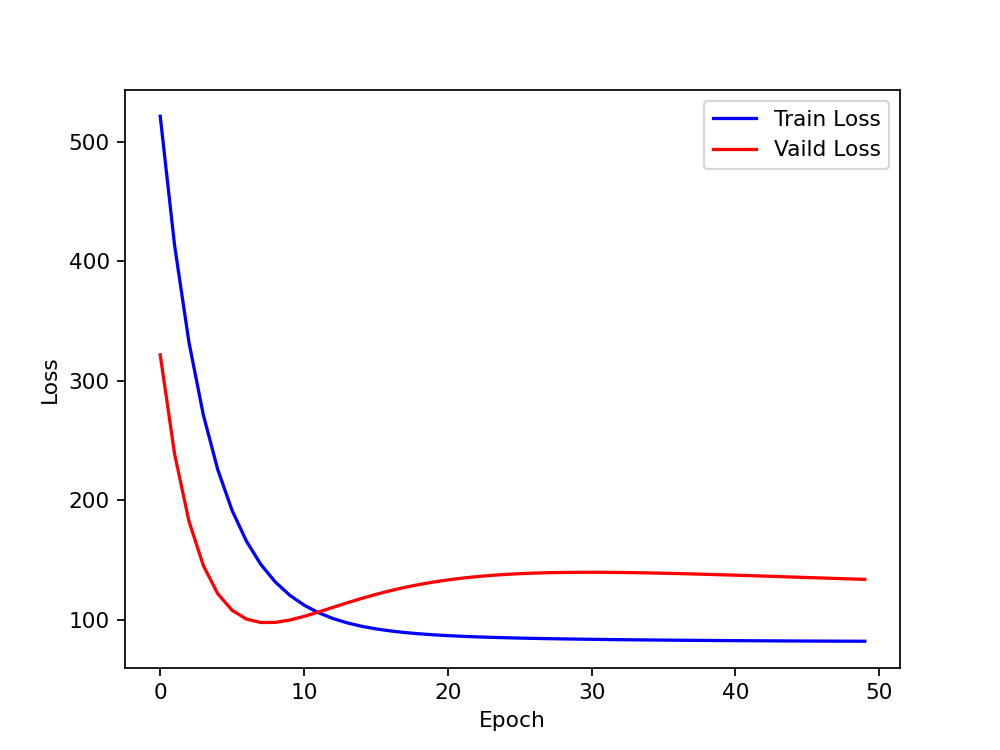

In [41]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_list_train, 'blue', label = "Train Loss")
plt.plot(loss_list_vaild, 'red', label = "Vaild Loss")
plt.legend(loc = 1)

In [41]:
print("Test_loss: {:.4f}".format(loss(x_test, y_test, W, B).numpy()))

Test_loss: 215.9528


In [62]:
test_house_id = np.random.randint(0, test_num)
y = y_test[test_house_id]
y_pred = model(x_test, W,B)[test_house_id]
y_predit = tf.reshape(y_pred,()).numpy()
print("House id", test_house_id, "Actual Value", y, "Predicted value", y_predit)

House id 7 Actual Value 27.9 Predicted value 29.282093
